In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

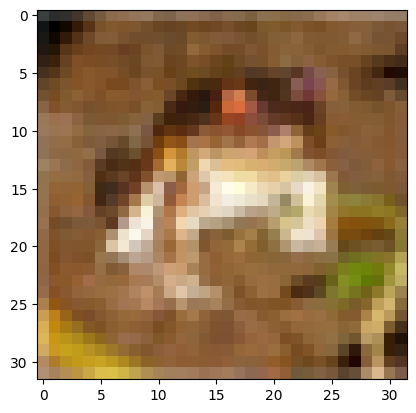

In [6]:
plt.imshow(X_train[0])

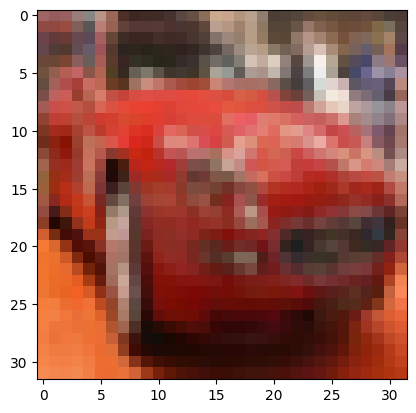

In [7]:
plt.imshow(X_train[5])

In [8]:
### NORMALIZE THE DATA
X_train = X_train/255
X_test = X_test/255

In [9]:
y_train_en = to_categorical(y_train,10)

In [10]:
y_test_en = to_categorical(y_test, 10)

In [14]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [16]:
history = model.fit(X_train, y_train_en, epochs=20,verbose=1,validation_data=(X_test,y_test_en))

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5117 - accuracy: 0.4516 - val_loss: 1.2852 - val_accuracy: 0.5446
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1913 - accuracy: 0.5785 - val_loss: 1.1113 - val_accuracy: 0.6145
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0503 - accuracy: 0.6320 - val_loss: 1.0502 - val_accuracy: 0.6345
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9523 - accuracy: 0.6659 - val_loss: 1.0415 - val_accuracy: 0.6390
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8735 - accuracy: 0.6935 - val_loss: 0.9566 - val_accuracy: 0.6699
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8158 - accuracy: 0.7157 - val_loss: 0.9524 - val_accuracy: 0.6715
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7597 - accuracy: 0.7318 - val_loss: 0.9476 - val